In [1]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-performance-uci-dataset/.student.zip_old
/kaggle/input/student-performance-uci-dataset/student/student-mat.csv
/kaggle/input/student-performance-uci-dataset/student/student-merge.R
/kaggle/input/student-performance-uci-dataset/student/student-por.csv
/kaggle/input/student-performance-uci-dataset/student/student.txt


## Details of Dataset used:

Author(s): P. Cortez, A. Silva<br>
Title: Using Data Mining to Predict Secondary School Student Performance<br>
Year: 2008<br>
Source: Available on the UCI Machine Learning Repository<br>
URL: https://archive.ics.uci.edu/ml/datasets/Student+Performance<br>

### Additional Information

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. In [Cortez and Silva, 2008], the dataset was modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades.

## Dataset Description:

#### Attributes for both student-por.csv (Portuguese course):
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - “ 5th to 9th grade, 3 - “ secondary education or 4 - “ higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - “ 5th to 9th grade, 3 - “ secondary education or 4 - “ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

#### These grades are related with the course subject, Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target for regression)

# Objective:
## To predict the final exam score (G3) of students based on given features

## Importing dataset:

In [2]:
df_por = pd.read_csv("../input/student-performance-uci-dataset/student/student-por.csv", delimiter = ";")

# <center> Exploratory Data Analysis

![IMAGE](https://drive.google.com/uc?export=download&id=1cae8BoDTTLHCaHZPi46pUL0DtDz4sLQm
)

In [3]:
display(df_por.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### First, we explore 'student-por.csv'

In [4]:
print("student-por.csv")
display(df_por.info())

student-por.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object

None

We see a lot of categorical variables like, Medu, Fedu, traveltime etc. are in numeric form. So, we convert them to categorical form.

In [5]:
cat_cols = ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'failures', 'age']
df_por[cat_cols] = df_por[cat_cols].astype('object')
obj2cat = df_por.select_dtypes(include=['object']).columns  #Also converting the object type variables to category as they are inherently categorical
df_por[obj2cat] = df_por[obj2cat].astype('category')
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      649 non-null    category
 1   sex         649 non-null    category
 2   age         649 non-null    category
 3   address     649 non-null    category
 4   famsize     649 non-null    category
 5   Pstatus     649 non-null    category
 6   Medu        649 non-null    category
 7   Fedu        649 non-null    category
 8   Mjob        649 non-null    category
 9   Fjob        649 non-null    category
 10  reason      649 non-null    category
 11  guardian    649 non-null    category
 12  traveltime  649 non-null    category
 13  studytime   649 non-null    category
 14  failures    649 non-null    category
 15  schoolsup   649 non-null    category
 16  famsup      649 non-null    category
 17  paid        649 non-null    category
 18  activities  649 non-null    category
 19  nursery 

The `describe` method shows basic statistical characteristics of each numerical feature (`int64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [6]:
df_por.describe().T

,count,mean,std,min,25%,50%,75%,max
absences,649.0,3.659476,4.640759,0.0,0.0,2.0,6.0,32.0
G1,649.0,11.399076,2.745265,0.0,10.0,11.0,13.0,19.0
G2,649.0,11.570108,2.913639,0.0,10.0,11.0,13.0,19.0
G3,649.0,11.906009,3.230656,0.0,10.0,12.0,14.0,19.0


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [7]:
df_por.describe(include = 'category').T

,count,unique,top,freq
school,649,2,GP,423
sex,649,2,F,383
age,649,8,17,179
address,649,2,U,452
famsize,649,2,GT3,457
Pstatus,649,2,T,569
Medu,649,5,2,186
Fedu,649,5,2,209
Mjob,649,5,other,258
Fjob,649,5,other,367


Separating the numeric columns:

In [8]:
numeric_cols_df = df_por.select_dtypes(include=["int64"])

Let's see the average value of numeric parameters for the students who scored above average

In [9]:
numeric_cols_df[numeric_cols_df.G3>=numeric_cols_df.G3.mean()].mean()

absences     2.965517
G1          13.258621
G2          13.586207
G3          14.149425
dtype: float64

Let's see the gender ratio in each school

In [10]:
grouped = df_por.groupby(['school','sex'], observed = False).size().unstack()
grouped = grouped.reset_index()
melted = pd.melt(grouped, id_vars='school', value_vars=['M', 'F'], var_name='gender', value_name='count')


In [11]:
fig = px.bar(melted, x = 'school', y = 'count', color = 'gender',
        labels = {'school':"School", 'count':"Total number of students", 'gender':"Gender"},
        barmode = 'stack', title = "Gender Distribution of the Schools",
        color_discrete_map = {"M":'blue', "F":'pink'},
        )

fig.update_layout(bargap = 0.8, width = 500, height = 500, title_x = 0.5)
fig.show()

<b>Observation: </b>
* We see both the schools have have more girls than boys

Visualizing the correlation matrix of the dataframe to have better insights about the relations among the numerical columns

In [12]:
corr_mat = numeric_cols_df.corr()
fig = go.Figure(go.Heatmap(
                z = corr_mat.values,
                x = corr_mat.columns,
                y = corr_mat.columns,
                colorscale = 'RdBu_r',
                colorbar = dict(title = 'Color Scale')
               ))
fig.update_layout(title = 'Correlation Matrix', width = 600, height = 600, title_x = 0.5)
fig.show()

<b>Observations:</b>
* We see a very high correlation between G1, G2 and G3 which is kind of obvious.

Let's check if any pair of numerical features have any significant relation that may not be linear

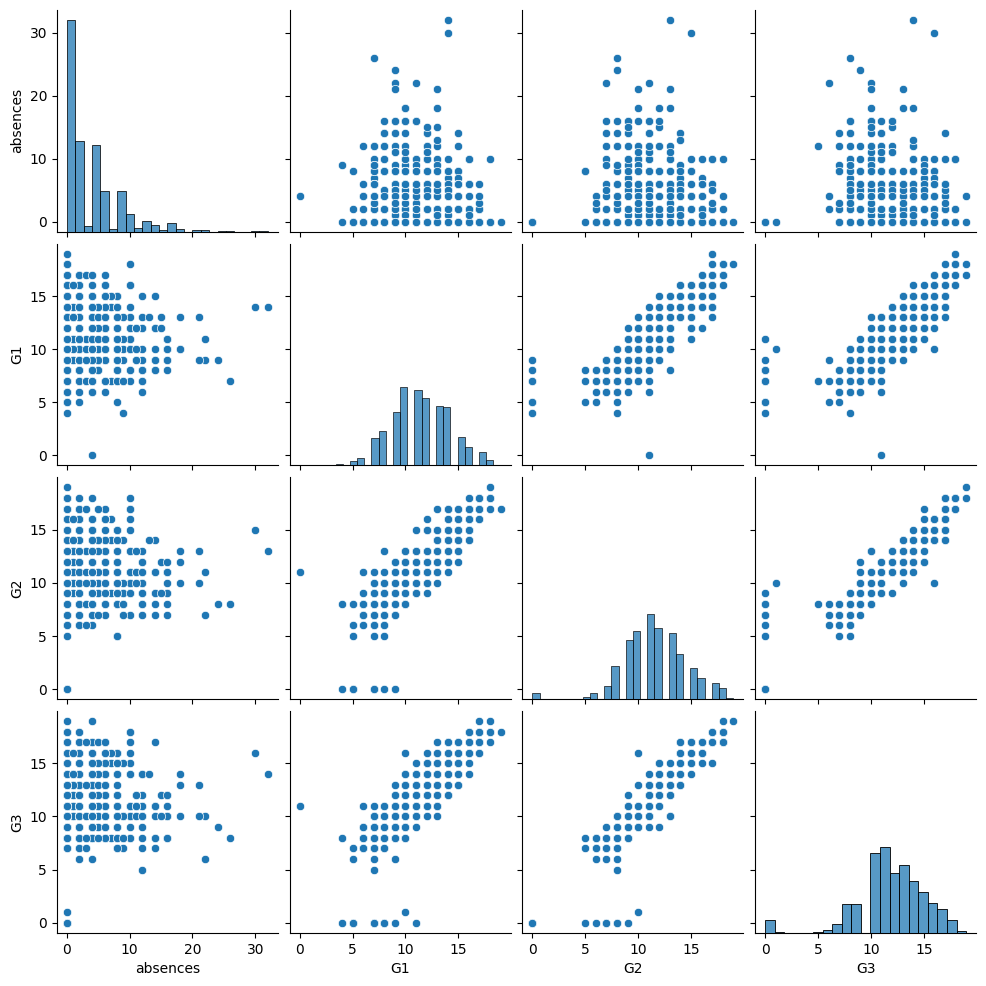

In [13]:
sns.pairplot(numeric_cols_df);

<b>Observation:</b>
* Except for G1 and G2 there is no strong relation between G3 and other features

In [14]:
binary_cols = []

for c in df_por.columns:
    if(df_por[c].nunique()==2 and df_por[c].dtype == 'category'):
        binary_cols.append(c)
        
binary_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

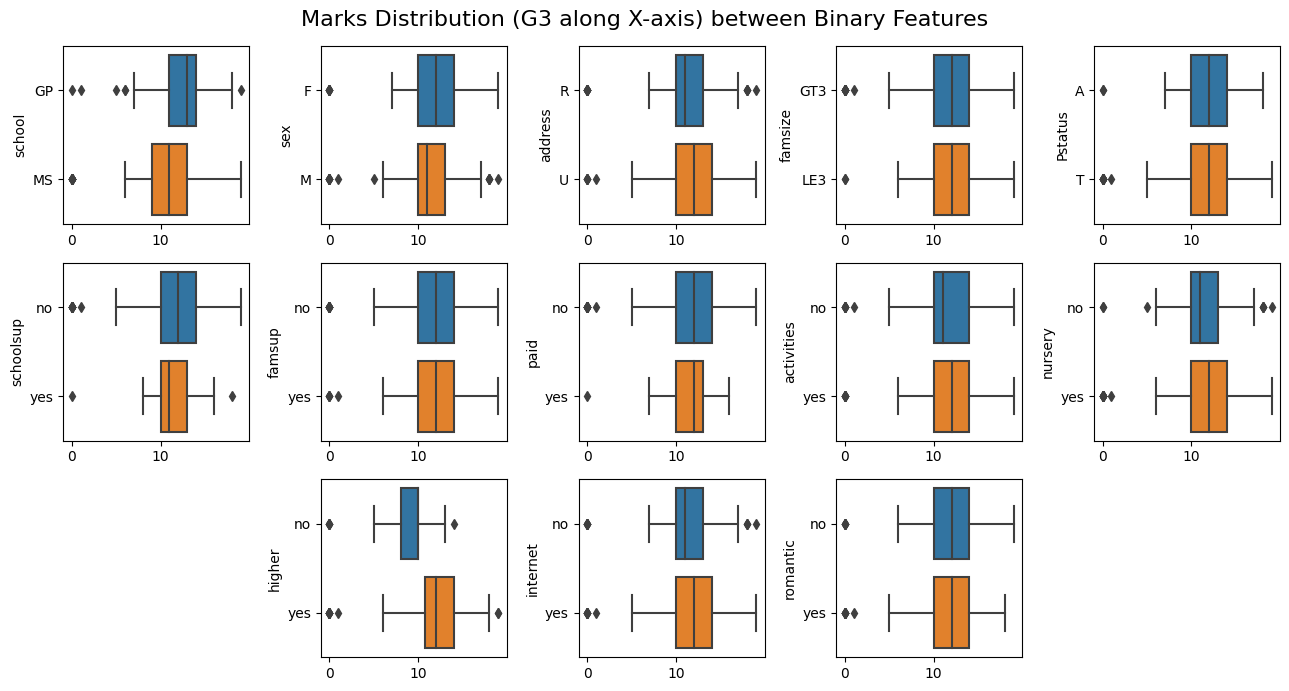

In [15]:
rows,cols = 3,5
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(13,7))

for idx, feat in enumerate(binary_cols):
    if(int(idx/cols)==rows-1):
        ax = axes[int(idx/cols), idx%cols+1]
    else:
        ax = axes[int(idx/cols), idx%cols]
    sns.boxplot(x = 'G3', y = feat, data = df_por, ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)

axes[-1,-1].remove()
axes[-1,0].remove()

plt.suptitle("Marks Distribution (G3 along X-axis) between Binary Features", fontsize=16)
fig.tight_layout();
plt.show();

<b>Observation: </b>
* We see the features which may contribute towards a difference in distribution of marks among students are: 
     * schoolsup
     * higher
     * internet
     * sex
     * address
     * school
     * nursery
     * actvities

Now lets see how other categorical features affect marks distribution

In [16]:
other_cat_cols = list(set(df_por.select_dtypes(include=['category']).columns) - set(binary_cols))
other_cat_cols

['famrel',
 'goout',
 'Dalc',
 'freetime',
 'Mjob',
 'Fjob',
 'failures',
 'guardian',
 'traveltime',
 'age',
 'reason',
 'studytime',
 'Medu',
 'Walc',
 'health',
 'Fedu']

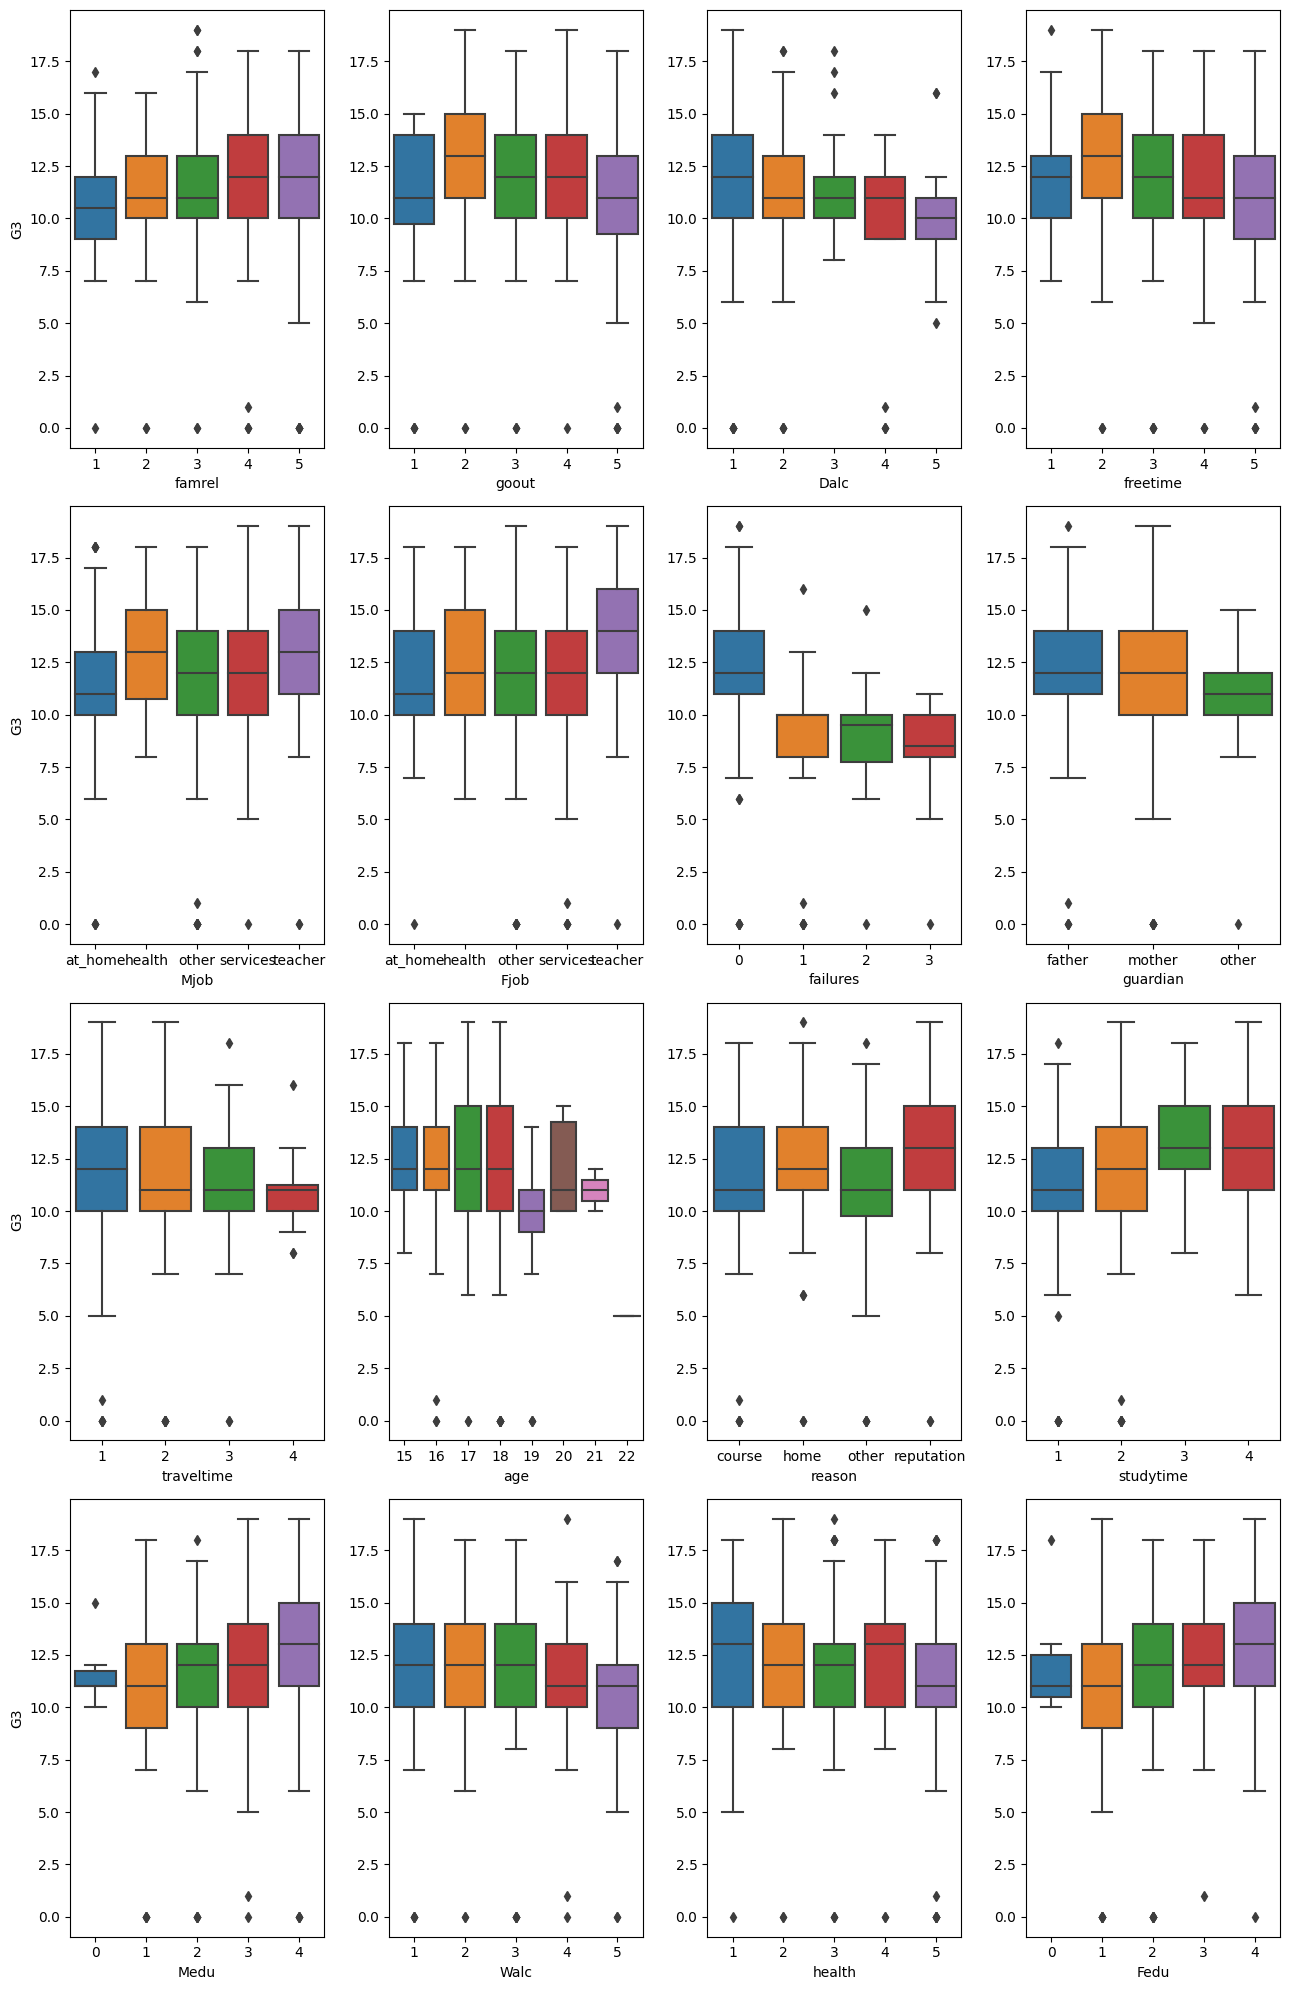

In [17]:
rows,cols = 4,4
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(13,20))

for idx, feat in enumerate(other_cat_cols):
    ax = axes[int(idx/cols), idx%cols]
    sns.boxplot(x = feat, y = 'G3', data = df_por, ax = ax)
    ax.set_ylabel("G3") if not idx%cols else ax.set_ylabel("")
    ax.set_xlabel(feat)

fig.tight_layout();
plt.show();

<b>Observations: </b>
* Students having 0 failures score much higher
* Students whose mothers are guardian along with those very low weekend alcohol consumption have a high spread or variance
* Students whose father is a a teacher tend to score higher
* Students whose mother is in health sector tend to score higher

These are observations based on individual comparisons, it may happen that these change if we take the resultant effect of mixture of this features

Let's see the joint effect of father's education and mother's education on the final exam grade using heatmap

In [18]:
edu_effect = df_por.groupby(['Medu', 'Fedu'])['G3'].mean().unstack()
edu_effect_c = df_por.groupby(['Medu', 'Fedu'])['G3'].count().unstack()

fig = go.Figure(data = go.Heatmap(
                z = edu_effect.values, x = edu_effect.columns, y = edu_effect.index, text = edu_effect_c.values*100/len(df_por), hovertemplate='Fathers Education: %{y}<br>Mothers Education: %{x}<br>Mean Final Exam Score: %{z:.2f}<br>%age of Students: %{text:.2f}',
                colorscale = "YlGnBu", hoverongaps = False))

fig.update_layout(title="Joint effect of Father's and Mother's education on Student's Final Exam Marks",
                 xaxis_title = "Mother's Education",
                 yaxis_title = "Father's Education", title_x = 0.5,
                 width = 700, height = 700
                )

fig.show()

<b>Observation:</b>
* We see 14.64% students come from family where father and mother both have pursued higher education and their mean score is 13.12
* 0.15% students have parents with no education and their mean score is 11
* 6.78% students having their father pursued higher education and their mother, secondary education and they have the highest average score of 13.41

In [19]:
job_effect = df_por.groupby(['Mjob', 'Fjob'])['G3'].mean().unstack()
job_effect_c = df_por.groupby(['Mjob', 'Fjob'])['G3'].count().unstack()

fig = go.Figure(data = go.Heatmap(
                z = job_effect.values, x = job_effect.columns, y = job_effect.index, text = job_effect_c.values*100/len(df_por), hovertemplate='Fathers job: %{y}<br>Mothers job: %{x}<br>Mean Final Exam Score: %{z:.2f}<br>%age of Students: %{text:.2f}',
                colorscale = "YlGnBu", hoverongaps = False))

fig.update_layout(title="Joint effect of Father's and Mother's job on Student's Final Exam Marks",
                 xaxis_title = "Mother's job",
                 yaxis_title = "Father's job", title_x = 0.5,
                 width = 700, height = 700
                )

fig.show()

<b>Observation: </b>
* 0.15% of students have their mother at home and father at health sector. Their mean score is the least, 9.
* 0.31% of students have their mother as teacher and father at health sector and their mean score is the highest 16.
* Mean score of students having one of their parents as teacher: 13.13 (father) & 13.59 (mother) 

# <center>Data Preprocessing</center>

### Binary encoding the columns having 2 unique values with 0 and 1

In [20]:
school_encode = {'GP' : 0, 'MS' : 1}
sex_encode = {'F' : 0, 'M' : 1}
address_encode = {'U' : 0, 'R' : 1}
famsize_encode = {'LE3' : 0, 'GT3' : 1}
Pstatus_encode = {'A' : 0, 'T' : 1}
yes_no_encode = {'yes' : 1, 'no' : 0}

df_encoded = df_por.copy()
df_encoded['school'] = df_encoded['school'].map(school_encode)
df_encoded['sex'] = df_encoded['sex'].map(sex_encode)
df_encoded['address'] = df_encoded['address'].map(address_encode)
df_encoded['famsize'] = df_encoded['famsize'].map(famsize_encode)
df_encoded['Pstatus'] = df_encoded['Pstatus'].map(Pstatus_encode)
df_encoded = df_encoded.replace(yes_no_encode)

### One-hot encoding other categorical columns

In [21]:
df_encoded = pd.get_dummies(df_encoded, columns = ['Mjob'], prefix = ['Mjob_'])
df_encoded = pd.get_dummies(df_encoded, columns = ['Fjob'], prefix = ['Fjob_'])
df_encoded = pd.get_dummies(df_encoded, columns = ['reason'], prefix = ['reason_'])
df_encoded = pd.get_dummies(df_encoded, columns = ['guardian'], prefix = ['guardian_'])

Converting all the data in the table to `int64`

In [22]:
df_encoded = df_encoded.astype('int64')
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   school              649 non-null    int64
 1   sex                 649 non-null    int64
 2   age                 649 non-null    int64
 3   address             649 non-null    int64
 4   famsize             649 non-null    int64
 5   Pstatus             649 non-null    int64
 6   Medu                649 non-null    int64
 7   Fedu                649 non-null    int64
 8   traveltime          649 non-null    int64
 9   studytime           649 non-null    int64
 10  failures            649 non-null    int64
 11  schoolsup           649 non-null    int64
 12  famsup              649 non-null    int64
 13  paid                649 non-null    int64
 14  activities          649 non-null    int64
 15  nursery             649 non-null    int64
 16  higher              649 non-null    int64
 1

In [23]:
df_encoded.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob__other,Fjob__services,Fjob__teacher,reason__course,reason__home,reason__other,reason__reputation,guardian__father,guardian__mother,guardian__other
0,0,0,18,0,1,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,0,1,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,0,0,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,0,1,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,0,1,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


#### From here, we split our dataset into train and test for model training and testing purposes

In [24]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns = ['G3'])
y = df_encoded['G3']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 13)

### Let's scale our dataset using z-score method to maintain uniformity among features

In [25]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

<h1><center>Model Building</center></h1>

In [26]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob__other,Fjob__services,Fjob__teacher,reason__course,reason__home,reason__other,reason__reputation,guardian__father,guardian__mother,guardian__other
27,0,1,15,0,1,1,4,2,1,1,...,0,1,0,0,0,1,0,0,1,0
97,0,0,16,0,1,1,2,1,1,2,...,1,0,0,1,0,0,0,0,1,0
482,1,0,15,1,0,1,1,1,2,1,...,1,0,0,1,0,0,0,0,1,0
187,0,0,16,0,1,1,1,3,1,2,...,0,1,0,0,1,0,0,0,1,0
235,0,0,17,0,1,1,1,1,1,3,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,0,15,0,1,1,4,4,1,3,...,0,1,0,1,0,0,0,0,1,0
528,1,0,17,1,1,1,2,2,1,1,...,1,0,0,0,0,1,0,0,1,0
74,0,0,16,0,1,1,3,3,1,2,...,0,1,0,0,1,0,0,0,1,0
176,0,1,15,0,0,1,1,2,2,1,...,1,0,0,1,0,0,0,0,1,0


In [27]:
y_train

27     11
97     12
482     9
187    13
235    12
       ..
153    13
528     9
74     11
176    10
338    19
Name: G3, Length: 454, dtype: int64

**Let us define our metric:**<br> We will be using `mean_squared_error` as our metric for this regression problem


In [28]:
from sklearn.metrics import mean_squared_error as MSE

### **We will be starting with basic models and slowly increase complexity, in all the methods 5-fold Cross Validation is used to mitigate overfitting**

# Decision Tree Regressor

#### Let's see performance of Decision Trees using `DecisionTreeRegressor` from `sklearn.tree`

We will first use randomized hyperparameter search to find the best parameters and then do a grid search around the best set of parameters found from random search.

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

DTree = DecisionTreeRegressor(random_state = 17)

seed = np.random.RandomState(11)
rand_params = {
    'max_depth': seed.randint(1, 20, 10),
    'min_samples_split': seed.randint(2, 20, 10),
    'min_samples_leaf': seed.randint(1, 20, 10),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}
random_search = RandomizedSearchCV(DTree, param_distributions = rand_params, n_iter = 10, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1, random_state = 42)


random_search.fit(X_train, y_train)
print("Best Parameters (Random Search):", random_search.best_params_)
print("Best Score(Random Search) (Negative MSE):", random_search.best_score_)

Best Parameters (Random Search): {'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 14, 'criterion': 'friedman_mse'}
Best Score(Random Search) (Negative MSE): -2.386206322892962


Now, we will use Grid Search about the best parameters given by random search

In [30]:
best_rand_params = random_search.best_params_
grid_params = {
    'min_samples_split' : range(best_rand_params['min_samples_split']-2,best_rand_params['min_samples_split']+2),
    'min_samples_leaf' : range(best_rand_params['min_samples_leaf']-2,best_rand_params['min_samples_leaf']+2),
    'max_depth' : range(best_rand_params['max_depth']-2,best_rand_params['max_depth']+2)
}

DTree = DecisionTreeRegressor(max_features = None, criterion = 'friedman_mse', random_state = 17)
grid_search = GridSearchCV(DTree, param_grid = grid_params, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)

grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score (Negative MSE): ", grid_search.best_score_)

Best Parameters:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 13}
Best Score (Negative MSE):  -2.324576082841572


In [31]:
best_DTree = grid_search.best_estimator_

### Learning Curve for Decision Trees

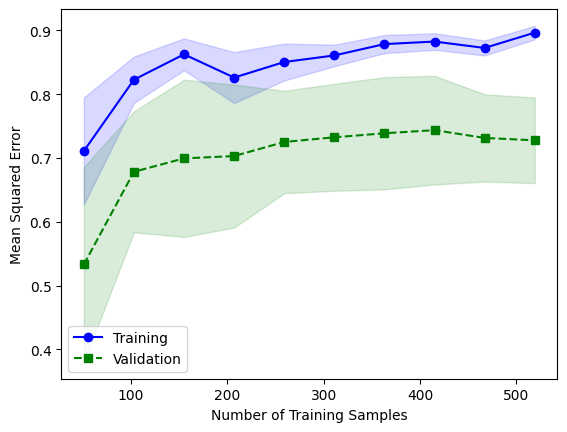

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_DTree, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', label='Validation')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

<b>Building the model which gave the best score in grid search and train it on the whole training set</b>

In [33]:
best_DTree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=12,
                      min_samples_leaf=8, min_samples_split=13,
                      random_state=17)

## Decision Tree Performance

In [34]:
y_pred = best_DTree.predict(X_test)
print("Mean Squared Error: {:.2f}".format(MSE(y_test,y_pred)))

Mean Squared Error: 1.52


# k-Nearest Neighbours

#### We will see the performance of kNN using `KNeighboursRegressor` from `sklearn.neighbors`

We will do the same thing as done in Decision Trees, i.e., first search hyperparameters using random search, then grid search around the best parameters obtained from it and, finally build the best model and see its performance

In [35]:
from sklearn.neighbors import KNeighborsRegressor

kNR = KNeighborsRegressor()

seed_knn = np.random.RandomState(69)
rand_params_knn = {
    'n_neighbors': seed_knn.randint(1, 20, size=10),      
    'weights': ['uniform', 'distance'],                       
    'p': [1, 2],                                                
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] 
}

random_search_knn = RandomizedSearchCV(kNR, param_distributions = rand_params_knn, n_jobs = -1, scoring = 'neg_mean_squared_error', cv = 5, random_state = 17, n_iter = 10)
random_search_knn.fit(X_train, y_train)
best_params_knn = random_search_knn.best_params_

best_kNR = random_search_knn.best_estimator_

grid_params_knn = {
    'n_neighbors' : range(best_params_knn['n_neighbors']-5, best_params_knn['n_neighbors']+5)
}

grid_search_knn = GridSearchCV(best_kNR, param_grid = grid_params_knn, n_jobs = -1, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)
print("Best Parameters: ", grid_search_knn.best_params_)
print("Best Score (Negative MSE): ", grid_search_knn.best_score_)

Best Parameters:  {'n_neighbors': 9}
Best Score (Negative MSE):  -2.6618245473309314


#### Learning curves are not applicable for kNNs as they make predictions on the test set using parameters that are not required to be learned from train set

In [36]:
best_kNR = grid_search_knn.best_estimator_
best_kNR.fit(X_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=9, weights='distance')

## kNN Performance

In [37]:
y_pred = best_kNR.predict(X_test)
print("Mean Squared Error: {:.2f}".format(MSE(y_test,y_pred)))

Mean Squared Error: 1.28


# Linear Regression

#### We will see the performance of linear regression using `LinearRegression`, `Lasso`, `Ridge` from `sklearn.linear_model`

In [38]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

First, lets see the performance of `LinearRegression`

In [39]:
lin_reg = LinearRegression()

param_dist = {
    'fit_intercept': [True, False],                             
}

grid_search_LR = GridSearchCV(lin_reg, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error')
grid_search_LR.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search_LR.best_params_)
print("Best Score (Negative MSE):", grid_search_LR.best_score_)

Best Parameters: {'fit_intercept': True}
Best Score (Negative MSE): -2.0554641729685104


In [40]:
best_lin_reg = grid_search_LR.best_estimator_
best_lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

## Linear Regression Performance without regularization

In [41]:
y_pred = best_lin_reg.predict(X_test_scaled)
print("Mean Squared Error: {:.2f}".format(MSE(y_test,y_pred)))

Mean Squared Error: 1.23


Now we use `Ridge` and also plot validation curve

In [42]:
from sklearn.model_selection import validation_curve

alphas = np.logspace(-5, 5, 50)  #Regularization Parameter

ridge = Ridge()

train_scores, valid_scores = validation_curve(
    ridge, X_train, y_train, param_name="alpha", param_range=alphas,
    scoring="neg_mean_squared_error", cv=5
)

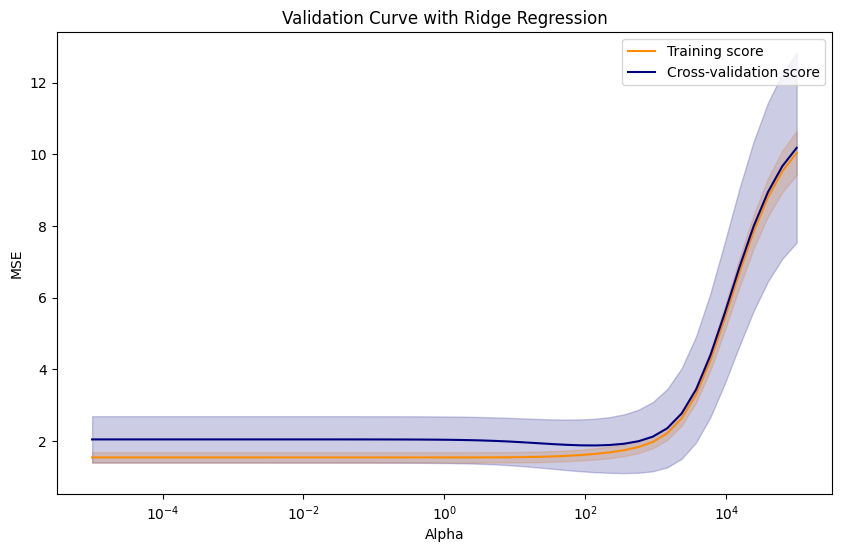

In [43]:
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(alphas, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.semilogx(alphas, valid_scores_mean, label="Cross-validation score", color="navy")
plt.fill_between(alphas, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy")
plt.title("Validation Curve with Ridge Regression")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.show()

We find the best alpha and create the best model

In [44]:
best_alphas = np.logspace(-2,5,100)
best_Ridge = RidgeCV(alphas = best_alphas, cv = 5, scoring = 'neg_mean_squared_error')
best_Ridge.fit(X_train_scaled, y_train)
print("Best Alpha: ",best_Ridge.alpha_)

Best Alpha:  6.7341506577508214


## Linear Regression Performance with ridge regularization

In [45]:
y_pred = best_Ridge.predict(X_test_scaled)
print("Mean Squared Error: {:.2f}".format(MSE(y_test,y_pred)))

Mean Squared Error: 1.24


# Random Forest

We will be using `RandomForestRegressor` from `sklearn.ensemble`

In [46]:
%%time
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(random_state = 19)

seedRF = np.random.RandomState(11)
rand_params_RF = {
    'n_estimators': seedRF.randint(50,200,10),
    'max_depth': seedRF.randint(10,30,10),
    'min_samples_split': seedRF.randint(4,10,10),
    'min_samples_leaf': seedRF.randint(4,10,10),
    'max_features': ['sqrt', 'log2', None] 
}

random_search_RF = RandomizedSearchCV(RF, param_distributions = rand_params_RF, n_jobs = -1, scoring = 'neg_mean_squared_error', cv = 5, random_state = 69, n_iter = 15)
random_search_RF.fit(X_train, y_train)
best_params_RF = random_search_RF.best_params_

best_RF = random_search_RF.best_estimator_

grid_params_RF = {
    'max_depth' : range(best_params_RF['max_depth']-2, best_params_RF['max_depth']+2),
    'min_samples_split' : range(best_params_RF['min_samples_split']-2, best_params_RF['min_samples_split']+2),
    'min_samples_leaf' : range(best_params_RF['min_samples_leaf']-2, best_params_RF['min_samples_leaf']+2)
}

grid_search_RF = GridSearchCV(RF, param_grid = grid_params_RF, n_jobs = -1, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_RF.fit(X_train, y_train)

print("Best Parameters: ", grid_search_RF.best_params_)
print("Best Score (Negative MSE): ",grid_search_RF.best_score_)

Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 3}
Best Score (Negative MSE):  -1.994492848024133
CPU times: user 2.57 s, sys: 172 ms, total: 2.75 s
Wall time: 46.4 s


### Learning Curve for Random Forest:

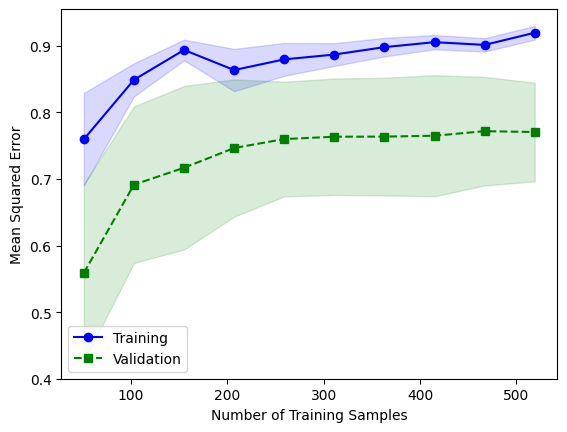

In [47]:
train_sizes, train_scores, test_scores = learning_curve(
    best_RF, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', label='Validation')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [48]:
best_RF = grid_search_RF.best_estimator_
best_RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=3,
                      random_state=19)

## Random Forest Performance

In [49]:
y_pred = best_RF.predict(X_test)
print("Mean Squared Error: {:.2f}".format(MSE(y_test,y_pred)))

Mean Squared Error: 1.06


# XGBoost

We will be using `XGBRegressor` from `xgboost`

In [50]:
%%time
from xgboost import XGBRegressor

xg = XGBRegressor(random_state = 19)

seedxg = np.random.RandomState(11)
rand_params_xg = {
    'n_estimators': seedxg.randint(50,200,20),
    'max_depth': seedxg.randint(5,30,10),
    'learning_rate': [0.01, 0.05, 0.1, 0.001],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5] 
}

random_search_xg = RandomizedSearchCV(xg, param_distributions = rand_params_xg, n_jobs = -1, scoring = 'neg_mean_squared_error', cv = 5, random_state = 69, n_iter = 15)
random_search_xg.fit(X_train, y_train)
best_params_xg = random_search_xg.best_params_

best_xg = random_search_xg.best_estimator_
print("Best Parameters (Random Search): ", random_search_xg.best_params_)
grid_params_xg = {
    'max_depth' : range(best_params_xg['max_depth']-2, best_params_xg['max_depth']+2),
}

grid_search_xg = GridSearchCV(xg, param_grid = grid_params_xg, n_jobs = -1, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_xg.fit(X_train, y_train)

print("Best Parameters: ", grid_search_xg.best_params_)
print("Best Score (Negative MSE): ",grid_search_xg.best_score_)

Best Parameters (Random Search):  {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 87, 'max_depth': 29, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best Parameters:  {'max_depth': 27}
Best Score (Negative MSE):  -2.5668381228709327
CPU times: user 3.01 s, sys: 79.8 ms, total: 3.09 s
Wall time: 9.59 s


In [51]:
best_xg = grid_search_xg.best_estimator_
best_xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=27, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=19, ...)

## XGBoost Performance

In [52]:
y_pred = best_xg.predict(X_test)
print("Mean Squared Error: {:.2f}".format(MSE(y_test,y_pred)))

Mean Squared Error: 1.41


# CatBoost

We will be using `CatBoostRegressor` from `catboost`

In [53]:
%%time
from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_state = 19, verbose = False)

seedcat = np.random.RandomState(11)
rand_params_cat = {
    'iterations': seedcat.randint(100,500,10),
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': seedcat.randint(3,15,10),
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'random_strength': [1, 3, 5],
    'border_count': [32, 64, 128],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

random_search_cat = RandomizedSearchCV(cat, param_distributions = rand_params_cat, n_jobs = -1, scoring = 'neg_mean_squared_error', cv = 5, random_state = 69, n_iter = 15)
random_search_cat.fit(X_train, y_train)
best_params_cat = random_search_cat.best_params_

best_cat = random_search_cat.best_estimator_
print("Best Parameters (Random Search): ", random_search_cat.best_params_)
grid_params_cat = {
    'depth' : range(best_params_cat['depth']-2, best_params_cat['depth']+2),
}

grid_search_cat = GridSearchCV(cat, param_grid = grid_params_cat, n_jobs = -1, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_cat.fit(X_train, y_train)

print("Best Parameters: ", grid_search_cat.best_params_)
print("Best Score (Negative MSE): ",grid_search_cat.best_score_)

Best Parameters (Random Search):  {'subsample': 0.7, 'random_strength': 1, 'learning_rate': 0.05, 'l2_leaf_reg': 7, 'iterations': 438, 'depth': 4, 'border_count': 128, 'bagging_temperature': 0.5}
Best Parameters:  {'depth': 4}
Best Score (Negative MSE):  -2.2311416926172063
CPU times: user 3.48 s, sys: 830 ms, total: 4.31 s
Wall time: 2min 53s


In [54]:
best_cat = grid_search_cat.best_estimator_
best_cat.fit(X_train,y_train)

### CatBoost Performance

In [55]:
y_pred = best_cat.predict(X_test)
print("Mean Squared Error: {:.2f}".format(MSE(y_test,y_pred)))

Mean Squared Error: 1.11


# LightGBM

We will be using `LGBMRegressor` from `lightgbm`

In [56]:
%%time

import logging
logging.getLogger('lightgbm').setLevel(logging.ERROR) #To mute warnings
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state = 19, verbose = -1)

seedlgbm = np.random.RandomState(11)
rand_params_lgbm = {
    'n_estimators': seedlgbm.randint(100,500,10),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': seedlgbm.randint(3,15,10),
    'num_leaves': [31, 63, 127],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
}

random_search_lgbm = RandomizedSearchCV(lgbm, param_distributions = rand_params_lgbm, n_jobs = -1, scoring = 'neg_mean_squared_error', cv = 5, random_state = 69, n_iter = 15)
random_search_lgbm.fit(X_train, y_train)
best_params_lgbm = random_search_lgbm.best_params_

best_lgbm = random_search_lgbm.best_estimator_
print("Best Parameters (Random Search): ", random_search_lgbm.best_params_)
grid_params_lgbm = {
    'max_depth' : range(best_params_lgbm['max_depth']-2, best_params_lgbm['max_depth']+2),
}

grid_search_lgbm = GridSearchCV(lgbm, param_grid = grid_params_lgbm, n_jobs = -1, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_lgbm.fit(X_train, y_train)

print("Best Parameters: ", grid_search_lgbm.best_params_)
print("Best Score (Negative MSE): ",grid_search_lgbm.best_score_)

Best Parameters (Random Search):  {'subsample': 0.7, 'num_leaves': 127, 'n_estimators': 369, 'min_child_samples': 20, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best Parameters:  {'max_depth': 8}
Best Score (Negative MSE):  -2.446817380046723
CPU times: user 1.97 s, sys: 391 ms, total: 2.36 s
Wall time: 11.7 s


In [57]:
best_lgbm = grid_search_lgbm.best_estimator_
best_lgbm.fit(X_train, y_train)

LGBMRegressor(max_depth=8, random_state=19, verbose=-1)

### LightGBM Performance

In [58]:
y_pred = best_lgbm.predict(X_test)
print("Mean Squared Error: {:.2f}".format(MSE(y_test,y_pred)))

Mean Squared Error: 1.27


# <center><b>Final Model: </b>Ensemble of all Models</center>

In [59]:
%%time
from sklearn.ensemble import VotingRegressor
mse_values = {
    'Decision Trees': MSE(y_test, best_DTree.predict(X_test)),
    'kNN': MSE(y_test, best_kNR.predict(X_test)),
    'Linear Regression': MSE(y_test, best_lin_reg.predict(X_test_scaled)),
    'Ridge': MSE(y_test, best_Ridge.predict(X_test_scaled)),
    'Random Forest': MSE(y_test, best_RF.predict(X_test)),
    'XGB': MSE(y_test, best_xg.predict(X_test)),
    'CatBoost': MSE(y_test, best_cat.predict(X_test)),
    'LGBM': MSE(y_test, best_lgbm.predict(X_test))
}

w = {model: 1/mse for model, mse in mse_values.items()}

total_w = sum(w.values())
normalized_w = {model: w/total_w for model, w in w.items()}

models = [
    ('Decision Trees', best_DTree),
    ('kNN', best_kNR),
    ('Linear Regression', best_lin_reg),
    ('Ridge', best_Ridge),
    ('Random Forest', best_RF),
    ('XGB', best_xg),
    ('CatBoost', best_cat),
    ('LGBM', best_lgbm)
]

voting_regressor = VotingRegressor(estimators=models, weights=list(normalized_w.values()))
voting_regressor.fit(X_train, y_train)  #FINAL MODEL

y_pred_voting = voting_regressor.predict(X_test)
print("Ensemble Mean Squared Error: {:.2f}".format(MSE(y_test, y_pred_voting)))

Ensemble Mean Squared Error: 0.93
CPU times: user 18.2 s, sys: 12.5 s, total: 30.7 s
Wall time: 8.75 s


# <center>Feature Importance</center>

In [60]:
feat_imp = []

for name, model in voting_regressor.named_estimators_.items():
    if hasattr(model, 'feature_importances_'):
        feat_imp.append((name, model.feature_importances_))
    else:
        print(f"Model {name} does not have feature importance attribute.")

weighted_feat_imp = np.zeros(X_train.shape[1])

for name, imp in feat_imp:
    weighted_feat_imp += imp * w[name]

normalized_feat_imp = weighted_feat_imp / sum(w.values())

Model kNN does not have feature importance attribute.
Model Linear Regression does not have feature importance attribute.
Model Ridge does not have feature importance attribute.


In [61]:
feat_imp_df = pd.DataFrame(columns=["Feature"] + [name for name, _ in feat_imp])

feat_imp_df["Feature"] = X_train.columns
feat_imp_df = feat_imp_df.set_index("Feature")

for name, imp in feat_imp:
    feat_imp_df[name] = imp

feat_imp_df["Overall"] = normalized_feat_imp
feat_imp_df = feat_imp_df.sort_values(by=['Overall'], ascending = False)
feat_imp_df.head()

,Decision Trees,Random Forest,XGB,CatBoost,LGBM,Overall
Feature,,,,,,
G2,0.884339,0.882083,0.725398,57.979724,200,33.146221
G1,0.006476,0.008703,0.005896,15.626329,130,18.243239
absences,0.055300,0.035485,0.064349,3.917141,128,16.362028
age,0.025518,0.006876,0.004461,1.685590,85,10.728536
goout,0.007250,0.006460,0.009529,2.032958,68,8.678727


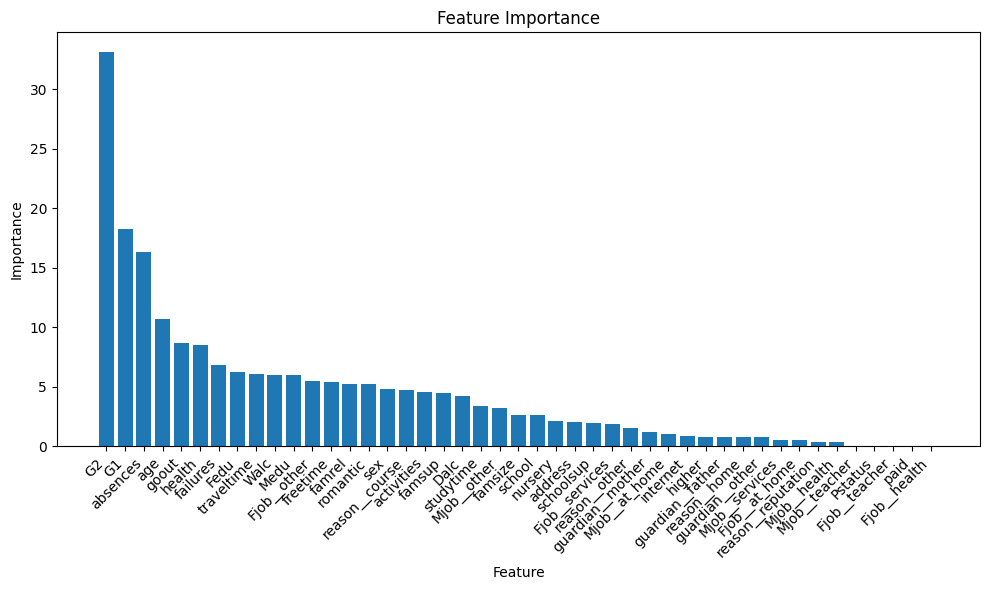

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(feat_imp_df.index, feat_imp_df['Overall'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Joining the predicted column to the test dataset:

In [63]:
test_df = pd.concat([df_por.iloc[X_test.index, :].reset_index(), pd.DataFrame(y_pred_voting)], axis = 1).drop(columns=['index']).rename(columns={0:'predicted_G3'})
test_df['squared_error'] = (test_df['G3'] - test_df['predicted_G3'])**2
test_df #this can be converted and stored in csv if needed

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,predicted_G3,squared_error
0,GP,F,16,U,GT3,T,4,3,other,at_home,...,5,1,1,3,2,12,13,13,12.928075,0.005173
1,MS,M,16,U,GT3,A,1,2,other,other,...,3,1,1,5,0,10,11,11,10.899368,0.010127
2,GP,F,16,U,GT3,T,4,4,other,other,...,4,1,2,1,4,12,13,13,13.301216,0.090731
3,GP,F,17,U,GT3,T,2,2,at_home,at_home,...,3,1,1,4,0,12,12,13,12.960459,0.001564
4,GP,M,16,R,GT3,A,4,4,other,teacher,...,3,1,1,5,4,13,13,13,13.120886,0.014613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,MS,M,17,R,LE3,T,1,3,other,other,...,2,3,3,5,2,12,11,12,11.690833,0.095584
191,GP,F,16,U,GT3,A,4,1,other,other,...,3,1,2,5,0,14,13,13,13.495883,0.245900
192,GP,M,15,U,LE3,T,4,2,teacher,other,...,2,1,1,3,10,18,17,18,17.316727,0.466863
193,GP,F,18,U,GT3,T,3,4,other,other,...,4,1,1,1,4,11,12,14,12.996070,1.007876
